In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlibpy import linear_regression as lnr
from mlibpy import polynomial_regression as pr

# Training Dataset

In [3]:
df = pd.read_csv("/datasets/polynomial_regression_train.csv")

In [5]:
df.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1,-0.299150,0.980381,-1.244780,0.420551,-0.352235,8.168743e-10
1,2,-0.374319,-1.179867,0.615588,0.054701,0.687182,-5.081225e-10
2,3,-1.240429,-0.139086,-0.001653,0.487685,-0.242808,4.560170e-10
3,4,-0.429881,-1.724246,-0.098046,0.896504,0.318585,-2.647546e-09
4,5,-1.726345,1.945823,1.275979,-0.474670,1.050494,-1.704606e-08


In [6]:
df.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,4.800000e+04
mean,24000.500000,0.014624,-0.001115,0.002485,0.000691,-0.005121,-3.269558e-10
std,13856.550797,1.155884,1.153866,1.153978,1.154967,1.152439,1.068138e-08
min,1.000000,-1.999862,-1.999991,-1.999978,-1.999966,-1.999772,-1.324783e-07
25%,12000.750000,-0.985856,-1.001639,-0.993114,-1.000680,-1.008619,-4.429828e-09
50%,24000.500000,0.026047,-0.003151,0.005507,0.004328,-0.004125,-2.899588e-10
75%,36000.250000,1.015535,0.995264,1.002954,0.997696,0.989219,3.138653e-09
max,48000.000000,1.999643,1.999889,1.999958,1.999699,1.999968,1.059597e-07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         48000 non-null  int64  
 1   Feature_1  48000 non-null  float64
 2   Feature_2  48000 non-null  float64
 3   Feature_3  48000 non-null  float64
 4   Feature_4  48000 non-null  float64
 5   Feature_5  48000 non-null  float64
 6   Target     48000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.6 MB


In [8]:
X = np.array(df.iloc[:40000, 1:6])
print(np.shape(X))
X[:2,:]

(40000, 5)


array([[-0.29915022,  0.98038137, -1.24478036,  0.42055144, -0.35223452],
       [-0.37431942, -1.17986704,  0.61558815,  0.05470112,  0.68718223]])

In [9]:
X_val = np.array(df.iloc[40000:44000, 1:6])
print(np.shape(X_val))

(4000, 5)


In [10]:
y = np.array(df.iloc[:40000, 6])
np.shape(y)

(40000,)

In [11]:
y_val = np.array(df.iloc[40000:44000, 6])
np.shape(y_val)

(4000,)

In [12]:
m,n = np.shape(X)
print(m)
print(n)

40000
5


## Quadratic Polynomial

In [13]:
X_quad = pr.gen_poly(X, 2)
X_quad, X_quad_mean, X_quad_std = lnr.normalize(X_quad)
print(np.shape(X_quad))
X_quad[:2,:]

(40000, 20)


array([[-0.27170624,  0.85182164, -1.08179968,  0.36075994, -0.30343048,
        -1.04349759, -0.21931196,  0.27370184, -0.09804548,  0.07827846,
        -0.30772184, -0.91546016,  0.30445709, -0.26541756,  0.18440205,
        -0.39381934,  0.34133542, -0.97007371, -0.10667292, -1.00980655],
       [-0.33670028, -1.0234019 ,  0.53162226,  0.04410013,  0.59984387,
        -1.00118101,  0.33106133, -0.18061705, -0.01903031, -0.19388195,
         0.05465188, -0.54329429, -0.05324849, -0.61760742, -0.79704   ,
         0.02551707,  0.32973984, -1.11573264,  0.03236297, -0.71686039]])

In [14]:
w_quad = np.zeros(np.shape(X_quad)[1])
np.shape(w_quad)

(20,)

In [15]:
b_quad = 0

In [16]:
yhat_quad = lnr.predict(X_quad, w_quad, b_quad)
np.shape(yhat_quad)

(40000,)

In [17]:
lnr.find_cost(X_quad, w_quad, b_quad, y)

5.714553682142028e-17

In [18]:
n_iter_quad = 1000
alpha = 0.1
(w_quad, b_quad, cost_history_quad) = lnr.gradient_descent(X_quad, w_quad, b_quad, y, n_iter_quad, alpha)

Cost at iteration 0: 5.714553682142028e-17
Cost at iteration 100: 2.997492966942179e-17
Cost at iteration 200: 2.997492965021595e-17
Cost at iteration 300: 2.997492965021595e-17
Cost at iteration 400: 2.9974929650215965e-17
Cost at iteration 500: 2.9974929650215965e-17
Cost at iteration 600: 2.9974929650215965e-17
Cost at iteration 700: 2.9974929650215965e-17
Cost at iteration 800: 2.9974929650215965e-17
Cost at iteration 900: 2.9974929650215965e-17
Cost at iteration 1000: 2.9974929650215965e-17


In [19]:
print(b_quad)
print(w_quad)

-2.924403503545159e-10
[ 1.19659610e-09  1.49045667e-10  1.33979607e-09  7.84644172e-10
  9.26316989e-11  3.64011711e-09 -1.03721336e-09  3.73958575e-09
 -1.72595971e-09  1.56570804e-09 -1.87332549e-09 -2.15084724e-09
 -4.15348009e-11 -1.86841488e-10  7.74169588e-10 -1.59129630e-11
  5.90021010e-10 -3.58117219e-10 -1.28276288e-09 -2.31398109e-09]


In [20]:
cost_history_quad[::n_iter_quad//50]

array([5.71455368e-17, 3.03653079e-17, 2.99806238e-17, 2.99750139e-17,
       2.99749309e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17, 2.99749297e-17, 2.99749297e-17,
       2.99749297e-17, 2.99749297e-17])

In [21]:
yhat_quad = lnr.predict(X_quad, w_quad, b_quad)
yhat_quad

array([ 1.81305575e-09, -2.20166028e-09,  4.38864562e-09, ...,
        9.40699570e-09, -3.42197698e-09, -5.77686071e-09])

In [22]:
X_quad_val = pr.gen_poly(X_val, 2)
X_quad_val,_,_ = lnr.normalize(X_quad_val, X_quad_mean, X_quad_std)
print(np.shape(X_quad_val))

(4000, 20)


In [23]:
yhat_quad_val = lnr.predict(X_quad_val, w_quad, b_quad)
yhat_quad_val

array([-3.09637824e-09, -8.66686007e-09, -1.20023743e-08, ...,
       -8.70778626e-09,  7.40179515e-10,  4.84956303e-09])

In [24]:
r2_quad_train = lnr.r2_score(y, yhat_quad)
r2_quad_val = lnr.r2_score(y_val, yhat_quad_val)
print(r2_quad_train)
print(r2_quad_val)

0.4750705364028074
0.48252755528599567


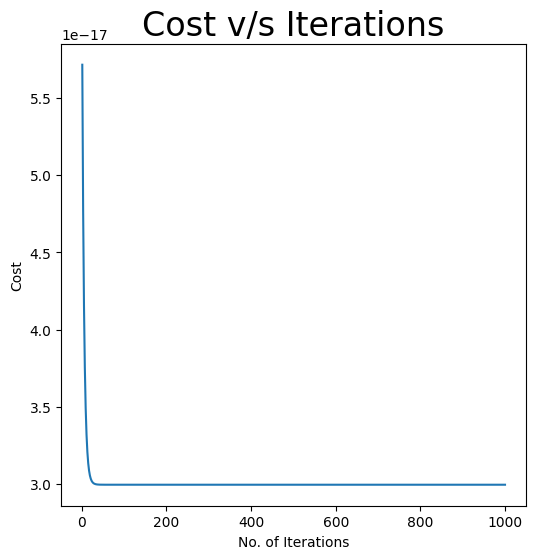

In [25]:
plt.figure(figsize = (6,6), dpi = 100)

plt.title("Cost v/s Iterations", fontdict = {'fontsize' : 24})
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

x_axis = list(range(1, n_iter_quad+1, 1))
y_axis = (cost_history_quad)

plt.plot(x_axis, y_axis, '-')

plt.show()

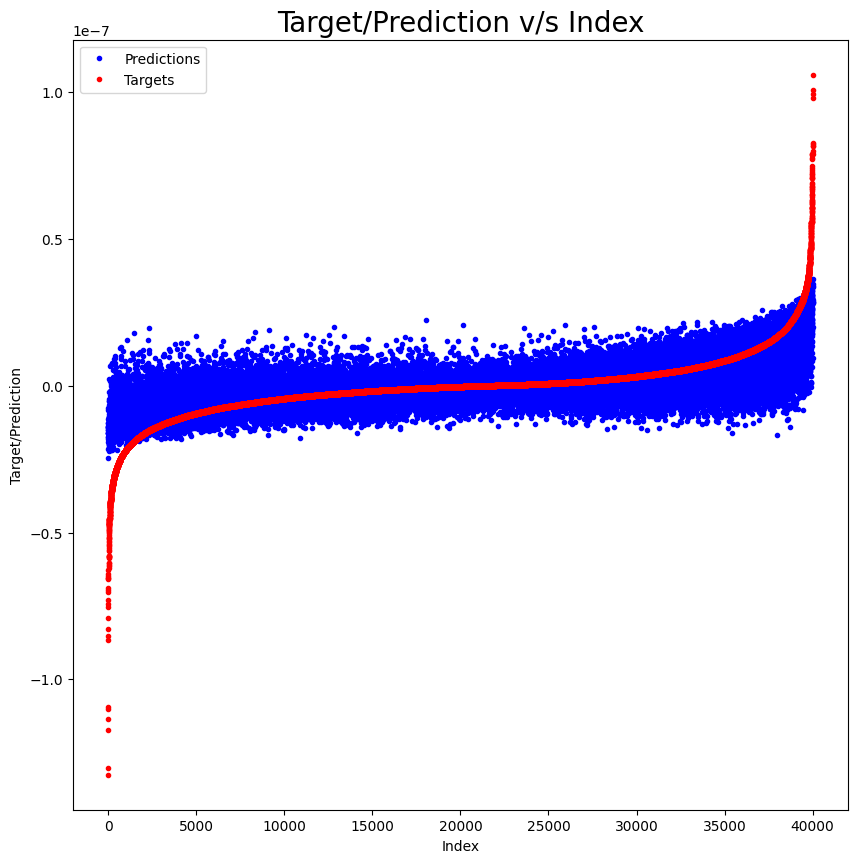

In [26]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_quad = yhat_quad[sorted_indices]

plt.plot(df.iloc[:m, 0], yhatsort_quad, '.', color = 'b', label = 'Predictions')
plt.plot(df.iloc[:m, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

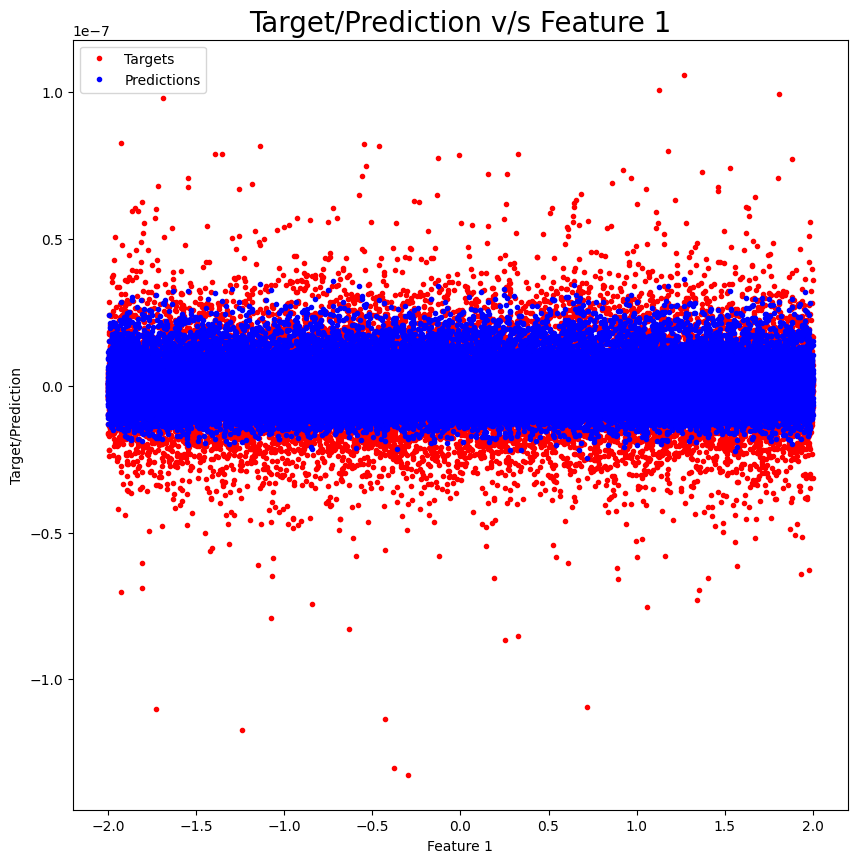

In [27]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Feature 1", fontdict = {'fontsize' : 20})
plt.xlabel("Feature 1")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_quad = yhat_quad[sorted_indices]

plt.plot(df.iloc[:m, 1], ysort, '.', color = 'r', label = 'Targets')
plt.plot(df.iloc[:m, 1], yhatsort_quad, '.', color = 'b', label = 'Predictions')

plt.legend()
plt.show()

## Cubic Polynomial

In [28]:
X_cube = pr.gen_poly(X, 3)
X_cube, X_cube_mean, X_cube_std = lnr.normalize(X_cube)
print(np.shape(X_cube))
X_cube[:1,:]

(40000, 55)


array([[-0.27170624,  0.85182164, -1.08179968,  0.36075994, -0.30343048,
        -1.04349759, -0.21931196,  0.27370184, -0.09804548,  0.07827846,
        -0.30772184, -0.91546016,  0.30445709, -0.26541756,  0.18440205,
        -0.39381934,  0.34133542, -0.97007371, -0.10667292, -1.00980655,
        -0.01919181,  0.04299007, -0.0540064 ,  0.01723392, -0.01272143,
        -0.14720705,  0.24305713, -0.07596985,  0.07336951, -0.23600773,
         0.10371597, -0.09509224, -0.03825238,  0.0308169 , -0.03010198,
         0.31346199, -0.58882459,  0.19991536, -0.16396499,  0.74275449,
        -0.32709909,  0.27701893,  0.08285965, -0.0900032 ,  0.05771697,
        -0.64100685,  0.31462139, -0.26862316, -0.10367608,  0.12987739,
        -0.07583622,  0.02299   , -0.03060175,  0.01813329, -0.01206646]])

In [29]:
w_cube = np.zeros(np.shape(X_cube)[1])
np.shape(w_cube)

(55,)

In [30]:
b_cube = 0

In [31]:
yhat_cube = lnr.predict(X_cube, w_cube, b_cube)
np.shape(yhat_cube)

(40000,)

In [32]:
lnr.find_cost(X_cube, w_cube, b_cube, y)

5.714553682142028e-17

In [33]:
n_iter_cube = 1000
alpha = 0.1
(w_cube, b_cube, cost_history_cube) = lnr.gradient_descent(X_cube, w_cube, b_cube, y, n_iter_cube, alpha)

Cost at iteration 0: 5.714553682142028e-17
Cost at iteration 100: 2.2779616735355323e-17
Cost at iteration 200: 2.2731943664782083e-17
Cost at iteration 300: 2.271911181111619e-17
Cost at iteration 400: 2.2715550542179055e-17
Cost at iteration 500: 2.2714561593978048e-17
Cost at iteration 600: 2.2714286912827454e-17
Cost at iteration 700: 2.2714210605376755e-17
Cost at iteration 800: 2.2714189402876632e-17
Cost at iteration 900: 2.271418351052568e-17
Cost at iteration 1000: 2.2714181880812542e-17


In [34]:
print(w_cube)
print(b_cube)

[-5.73659966e-10  1.35087749e-10 -1.93267102e-09  1.73780870e-10
 -7.12335041e-10  3.61406804e-09 -1.03345093e-09  3.73860252e-09
 -1.70444475e-09  1.54676297e-09 -1.84180621e-09 -2.09144032e-09
 -2.91785118e-11 -1.89781301e-10  7.54381485e-10 -1.67894743e-11
  5.89369528e-10 -3.50621958e-10 -1.22712850e-09 -2.34844207e-09
  4.59205347e-10  6.88677280e-10  2.25645331e-10 -6.00759860e-10
  4.68744139e-10 -1.57071839e-09 -4.40032488e-10  4.29736782e-10
 -6.30043383e-10  1.35524615e-09  3.28642128e-10 -2.66169219e-10
  1.29498412e-09 -7.37115845e-10  7.32763040e-10 -4.88528259e-11
  2.04950908e-09  2.22282878e-09 -3.22078440e-10  1.68646758e-10
  6.24465985e-10  1.39795470e-09 -6.18169672e-10  9.03525056e-10
 -1.47790637e-10  7.58631337e-10 -1.03605237e-09 -9.71036599e-10
  4.74834352e-10  3.47042689e-11  6.98417758e-10  4.62511353e-10
  1.26341747e-09 -3.64567811e-10  5.24329686e-10]
-2.924403503545159e-10


In [35]:
cost_history_cube[::n_iter_cube//50]

array([5.71455368e-17, 2.39760427e-17, 2.29836599e-17, 2.28462358e-17,
       2.28025250e-17, 2.27796167e-17, 2.27641103e-17, 2.27526252e-17,
       2.27438735e-17, 2.27371410e-17, 2.27319437e-17, 2.27279257e-17,
       2.27248177e-17, 2.27224129e-17, 2.27205520e-17, 2.27191118e-17,
       2.27179973e-17, 2.27171347e-17, 2.27164671e-17, 2.27159504e-17,
       2.27155505e-17, 2.27152411e-17, 2.27150015e-17, 2.27148161e-17,
       2.27146726e-17, 2.27145616e-17, 2.27144756e-17, 2.27144091e-17,
       2.27143576e-17, 2.27143178e-17, 2.27142869e-17, 2.27142630e-17,
       2.27142446e-17, 2.27142302e-17, 2.27142192e-17, 2.27142106e-17,
       2.27142040e-17, 2.27141988e-17, 2.27141949e-17, 2.27141918e-17,
       2.27141894e-17, 2.27141876e-17, 2.27141861e-17, 2.27141850e-17,
       2.27141842e-17, 2.27141835e-17, 2.27141830e-17, 2.27141826e-17,
       2.27141823e-17, 2.27141821e-17])

In [36]:
yhat_cube = lnr.predict(X_cube, w_cube, b_cube)
yhat_cube

array([ 4.26232841e-09, -3.38813022e-09,  5.32960485e-09, ...,
        1.38713873e-08, -5.91215849e-10, -1.43957659e-08])

In [37]:
X_cube_val = pr.gen_poly(X_val, 3)
X_cube_val,_,_ = lnr.normalize(X_cube_val, X_cube_mean, X_cube_std)
print(np.shape(X_cube_val))

(4000, 55)


In [38]:
yhat_cube_val = lnr.predict(X_cube_val, w_cube, b_cube)
yhat_cube_val

array([-2.76856452e-09, -1.59263151e-08, -1.42491265e-08, ...,
       -7.80119779e-09, -1.69814955e-09,  5.66740939e-09])

In [39]:
r2_cube_train = lnr.r2_score(y, yhat_cube)
r2_cube_val = lnr.r2_score(y_val, yhat_cube_val)
print(r2_cube_train)
print(r2_cube_val)

0.6022228093405007
0.6259189229795851


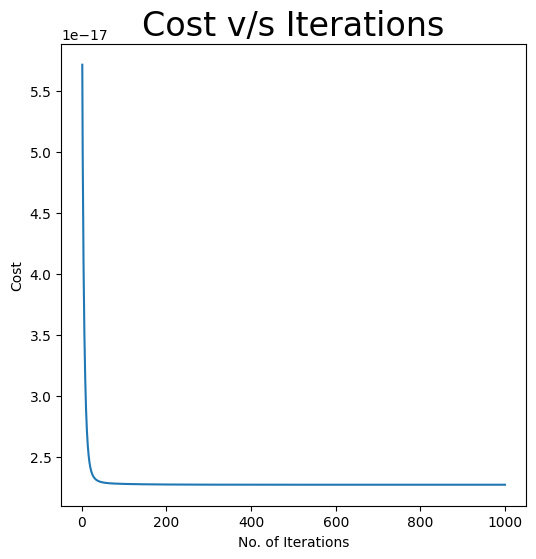

In [40]:
plt.figure(figsize = (6,6), dpi = 100)

plt.title("Cost v/s Iterations", fontdict = {'fontsize' : 24})
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

x_axis = list(range(1, n_iter_cube+1, 1))
y_axis = (cost_history_cube)

plt.plot(x_axis, y_axis, '-')

plt.show()

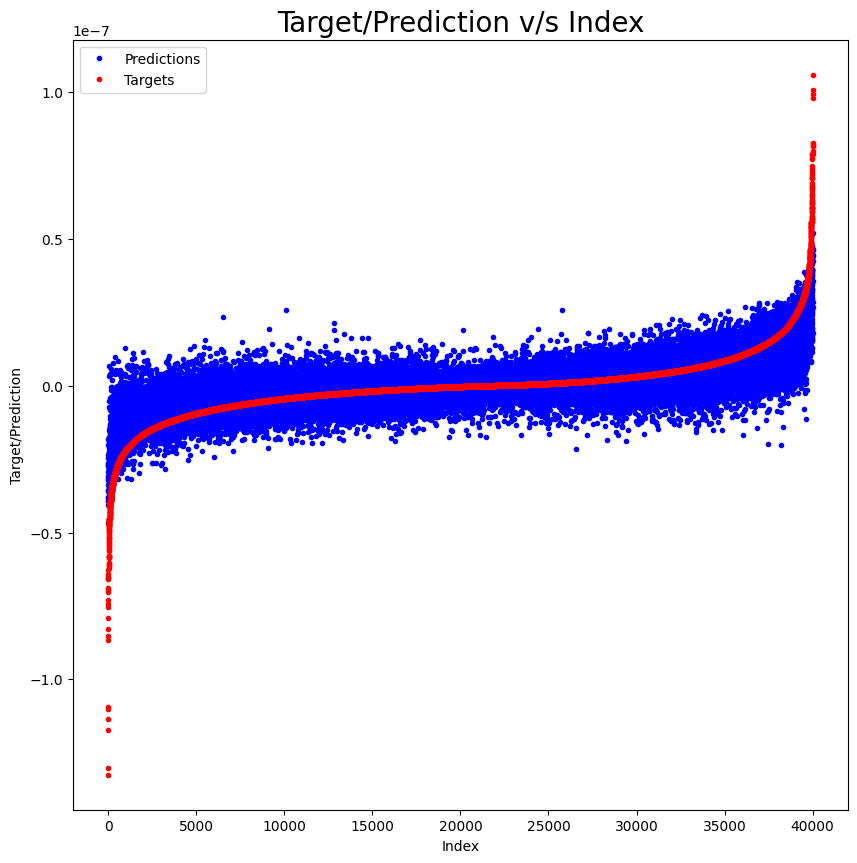

In [41]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_cube = yhat_cube[sorted_indices]

plt.plot(df.iloc[:m, 0], yhatsort_cube, '.', color = 'b', label = 'Predictions')
plt.plot(df.iloc[:m, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

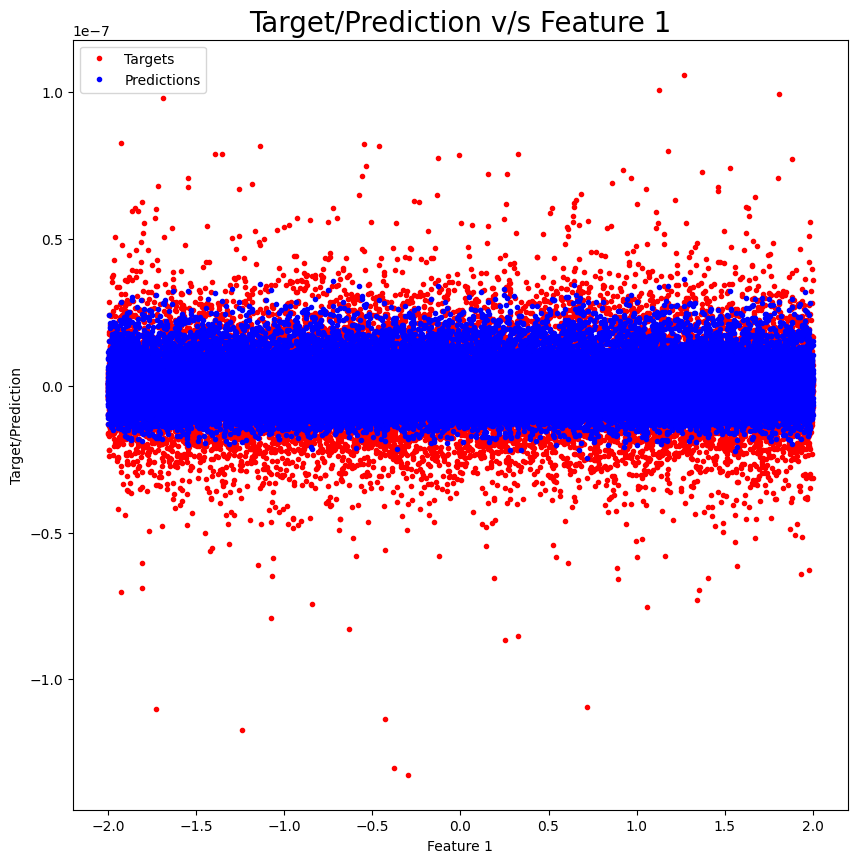

In [42]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Feature 1", fontdict = {'fontsize' : 20})
plt.xlabel("Feature 1")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_quad = yhat_quad[sorted_indices]

plt.plot(df.iloc[:m, 1], ysort, '.', color = 'r', label = 'Targets')
plt.plot(df.iloc[:m, 1], yhatsort_quad, '.', color = 'b', label = 'Predictions')

plt.legend()
plt.show()

## Fourth-Degree Polynomial

In [43]:
X_four = pr.gen_poly(X, 4)
X_four, X_four_mean, X_four_std = lnr.normalize(X_four)
print(np.shape(X_four))
X_four[:1,:]

(40000, 125)


array([[-0.27170624,  0.85182164, -1.08179968,  0.36075994, -0.30343048,
        -1.04349759, -0.21931196,  0.27370184, -0.09804548,  0.07827846,
        -0.30772184, -0.91546016,  0.30445709, -0.26541756,  0.18440205,
        -0.39381934,  0.34133542, -0.97007371, -0.10667292, -1.00980655,
        -0.01919181,  0.04299007, -0.0540064 ,  0.01723392, -0.01272143,
        -0.14720705,  0.24305713, -0.07596985,  0.07336951, -0.23600773,
         0.10371597, -0.09509224, -0.03825238,  0.0308169 , -0.03010198,
         0.31346199, -0.58882459,  0.19991536, -0.16396499,  0.74275449,
        -0.32709909,  0.27701893,  0.08285965, -0.0900032 ,  0.05771697,
        -0.64100685,  0.31462139, -0.26862316, -0.10367608,  0.12987739,
        -0.07583622,  0.02299   , -0.03060175,  0.01813329, -0.01206646,
        -0.74933581, -0.00701254,  0.00276089, -0.00736015, -0.00163743,
        -0.63476392, -0.03875469,  0.01357223, -0.0155254 , -0.6172124 ,
        -0.01828558,  0.02191489, -0.66493748, -0.0

In [44]:
w_four = np.zeros(np.shape(X_four)[1])
np.shape(w_four)

(125,)

In [45]:
b_four = 0

In [46]:
yhat_four = lnr.predict(X_four, w_four, b_four)
np.shape(yhat_four)

(40000,)

In [47]:
lnr.find_cost(X_four, w_four, b_four, y)

5.714553682142028e-17

In [48]:
n_iter_four = 1000
alpha = 0.1
(w_four, b_four, cost_history_four) = lnr.gradient_descent(X_four, w_four, b_four, y, n_iter_four, alpha)

Cost at iteration 0: 5.714553682142028e-17
Cost at iteration 100: 5.299569247407364e-18
Cost at iteration 200: 4.634409822353038e-18
Cost at iteration 300: 4.4067060231586735e-18
Cost at iteration 400: 4.313540095327913e-18
Cost at iteration 500: 4.274036670851875e-18
Cost at iteration 600: 4.256953806987144e-18
Cost at iteration 700: 4.2494502104844084e-18
Cost at iteration 800: 4.246111132184837e-18
Cost at iteration 900: 4.244609071779003e-18
Cost at iteration 1000: 4.2439317992647685e-18


In [49]:
print(w_four)
print(b_four)

[-3.67759864e-10  1.16681023e-10 -1.79222772e-09  8.76115702e-11
 -7.04251289e-10 -2.20245624e-09  9.28381018e-10 -2.24370813e-09
  1.79090842e-09 -1.73502824e-09  1.17193446e-09  2.20599413e-09
  3.65586146e-10  4.07680604e-10 -5.03510154e-10  2.44743133e-10
 -5.84169410e-10 -3.92977463e-10  1.98681736e-09  1.87433893e-09
  3.37453710e-10  6.20097331e-10  2.08977789e-10 -5.58130909e-10
  3.99793073e-10 -1.65620065e-09 -3.96192903e-10  4.42906077e-10
 -6.00533714e-10  1.27869846e-09  3.80284274e-10 -3.21096184e-10
  1.35074991e-09 -6.99910595e-10  7.04112257e-10 -7.35758530e-12
  1.99709324e-09  2.25749335e-09 -3.51372325e-10  1.40201602e-10
  6.44967404e-10  1.35262194e-09 -6.24440954e-10  8.99371735e-10
 -1.34918717e-10  6.69041568e-10 -1.00151205e-09 -9.45542918e-10
  4.66186600e-10  5.75142842e-11  6.77641860e-10  4.87515577e-10
  1.27311294e-09 -3.20597747e-10  5.62873111e-10  4.58624445e-09
  1.65101944e-09  2.23086297e-09 -2.19767432e-09  2.13132370e-09
  5.69254375e-10 -5.53589

In [50]:
cost_history_four[::n_iter_four//50]

array([5.71455368e-17, 1.03449649e-17, 7.22071868e-18, 6.13452337e-18,
       5.61212532e-18, 5.29956925e-18, 5.08649719e-18, 4.92961955e-18,
       4.80855794e-18, 4.71233826e-18, 4.63440982e-18, 4.57052315e-18,
       4.51772836e-18, 4.47386552e-18, 4.43728849e-18, 4.40670602e-18,
       4.38108474e-18, 4.35958617e-18, 4.34152365e-18, 4.32633117e-18,
       4.31354010e-18, 4.30276117e-18, 4.29367027e-18, 4.28599701e-18,
       4.27951547e-18, 4.27403667e-18, 4.26940229e-18, 4.26547960e-18,
       4.26215720e-18, 4.25934150e-18, 4.25695381e-18, 4.25492791e-18,
       4.25320805e-18, 4.25174721e-18, 4.25050576e-18, 4.24945021e-18,
       4.24855231e-18, 4.24778816e-18, 4.24713755e-18, 4.24658337e-18,
       4.24611113e-18, 4.24570857e-18, 4.24536526e-18, 4.24507239e-18,
       4.24482245e-18, 4.24460907e-18, 4.24442685e-18, 4.24427120e-18,
       4.24413819e-18, 4.24402450e-18])

In [51]:
yhat_four = lnr.predict(X_four, w_four, b_four)
yhat_four

array([ 7.85644218e-10, -1.38647081e-09, -5.67621768e-11, ...,
        2.92640779e-08,  9.03415656e-09, -1.20076032e-08])

In [52]:
X_four_val = pr.gen_poly(X_val, 4)
X_four_val,_,_ = lnr.normalize(X_four_val, X_four_mean, X_four_std)
print(np.shape(X_four_val))

(4000, 125)


In [53]:
yhat_four_val = lnr.predict(X_four_val, w_four, b_four)
yhat_four_val

array([ 8.32903568e-10, -1.95552388e-08, -2.28012345e-08, ...,
       -7.93415339e-09, -2.44001704e-09, -4.94438363e-09])

In [54]:
r2_four_train = lnr.r2_score(y, yhat_four)
r2_four_val = lnr.r2_score(y_val, yhat_four_val)
print(r2_four_train)
print(r2_four_val)

0.9256791424425194
0.9257475262736267


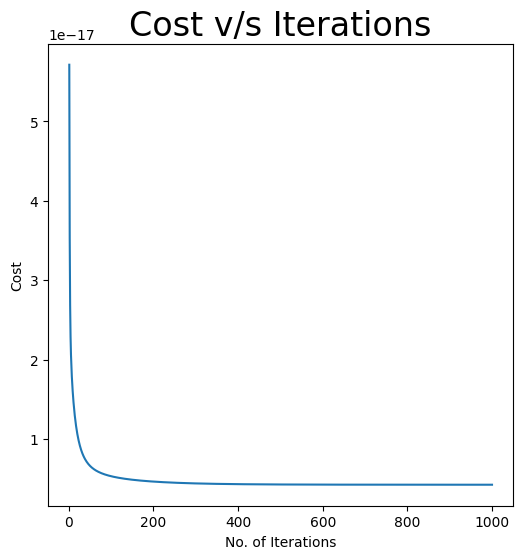

In [55]:
plt.figure(figsize = (6,6), dpi = 100)

plt.title("Cost v/s Iterations", fontdict = {'fontsize' : 24})
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

x_axis = list(range(1, n_iter_four+1, 1))
y_axis = (cost_history_four)

plt.plot(x_axis, y_axis, '-')

plt.show()

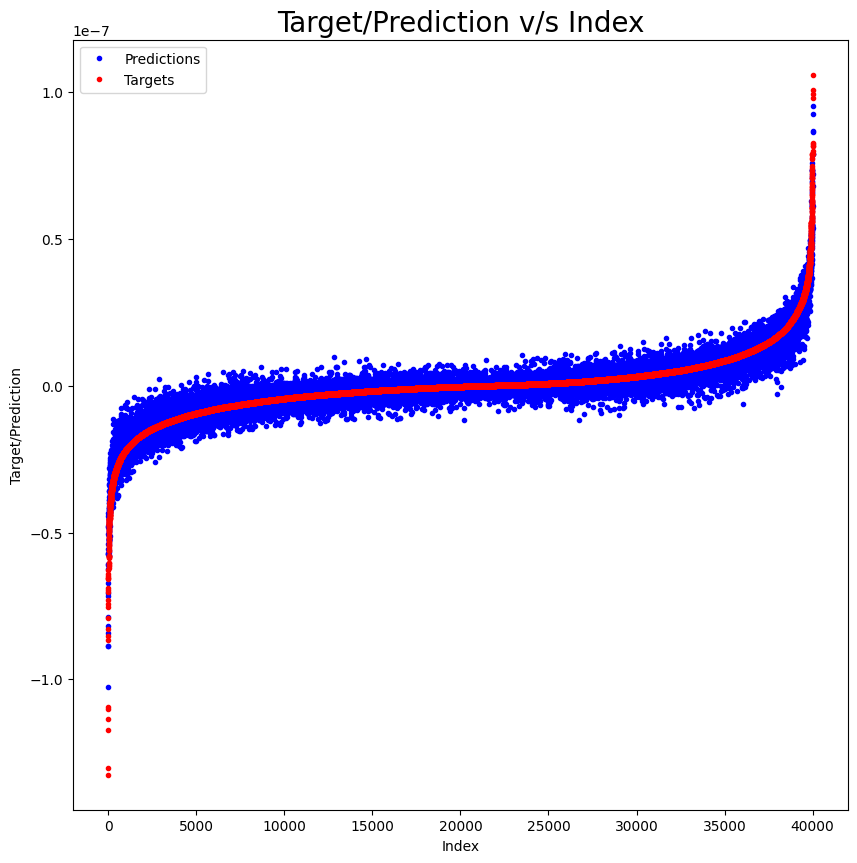

In [56]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_four = yhat_four[sorted_indices]

plt.plot(df.iloc[:m, 0], yhatsort_four, '.', color = 'b', label = 'Predictions')
plt.plot(df.iloc[:m, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

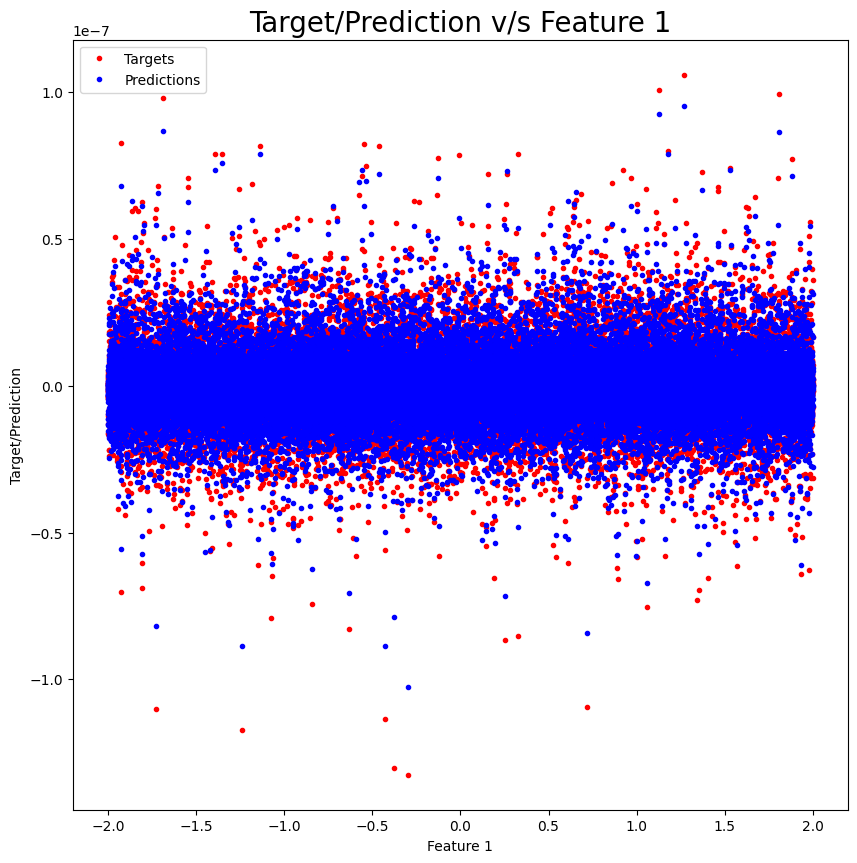

In [57]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Feature 1", fontdict = {'fontsize' : 20})
plt.xlabel("Feature 1")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_four = yhat_four[sorted_indices]

plt.plot(df.iloc[:m, 1], ysort, '.', color = 'r', label = 'Targets')
plt.plot(df.iloc[:m, 1], yhatsort_four, '.', color = 'b', label = 'Predictions')

plt.legend()
plt.show()

## Fifth-Degree Polynomial

In [58]:
n_iter_five = 1000
alpha = 0.1
X_five, w_five, b_five, cost_history_five, yhat_five, X_five_mean, X_five_std = pr.poly_regression(X, y, 5, n_iter_five, alpha, 0)

Cost at iteration 0: 5.714553682142028e-17
Cost at iteration 100: 3.751572816202404e-18
Cost at iteration 200: 3.0695260587483857e-18
Cost at iteration 300: 2.8380718296504084e-18
Cost at iteration 400: 2.7415946066999476e-18
Cost at iteration 500: 2.699592617603776e-18
Cost at iteration 600: 2.680802130902555e-18
Cost at iteration 700: 2.672157399907933e-18
Cost at iteration 800: 2.668048063875479e-18
Cost at iteration 900: 2.666014872718807e-18
Cost at iteration 1000: 2.6649659430827802e-18


In [59]:
print(np.shape(X_five))
print(np.shape(w_five))
print(b_five)

(40000, 251)
(251,)
-2.92440350354516e-10


In [60]:
cost_history_five[::n_iter_five//50]

array([5.71455368e-17, 8.42782819e-18, 5.68666617e-18, 4.61772558e-18,
       4.07761202e-18, 3.75157282e-18, 3.53073550e-18, 3.36959947e-18,
       3.24614731e-18, 3.14847097e-18, 3.06952606e-18, 3.00481412e-18,
       2.95126700e-18, 2.90667435e-18, 2.86937335e-18, 2.83807183e-18,
       2.81174181e-18, 2.78955190e-18, 2.77082197e-18, 2.75499121e-18,
       2.74159461e-18, 2.73024506e-18, 2.72061938e-18, 2.71244714e-18,
       2.70550165e-18, 2.69959262e-18, 2.69456011e-18, 2.69026956e-18,
       2.68660760e-18, 2.68347867e-18, 2.68080213e-18, 2.67850989e-18,
       2.67654437e-18, 2.67485688e-18, 2.67340620e-18, 2.67215740e-18,
       2.67108086e-18, 2.67015145e-18, 2.66934782e-18, 2.66865184e-18,
       2.66804806e-18, 2.66752337e-18, 2.66706657e-18, 2.66666811e-18,
       2.66631986e-18, 2.66601487e-18, 2.66574719e-18, 2.66551175e-18,
       2.66530417e-18, 2.66512075e-18])

In [61]:
yhat_five

array([ 2.31062828e-10, -5.92595208e-10, -2.54899763e-10, ...,
        3.22680734e-08,  1.03062841e-08, -1.39589469e-08])

In [62]:
X_five_val = pr.gen_poly(X_val, 5)
X_five_val,_,_ = lnr.normalize(X_five_val, X_five_mean, X_five_std)
print(np.shape(X_five_val))

(4000, 251)


In [63]:
yhat_five_val = lnr.predict(X_five_val, w_five, b_five)
yhat_five_val

array([-1.02875058e-09, -2.09795023e-08, -2.67634771e-08, ...,
       -8.72832933e-09, -4.14087385e-09, -4.82868964e-09])

In [64]:
r2_five_train = lnr.r2_score(y, yhat_five)
r2_five_val = lnr.r2_score(y_val, yhat_five_val)
print(r2_five_train)
print(r2_five_val)

0.9533304954212152
0.9514385286724253


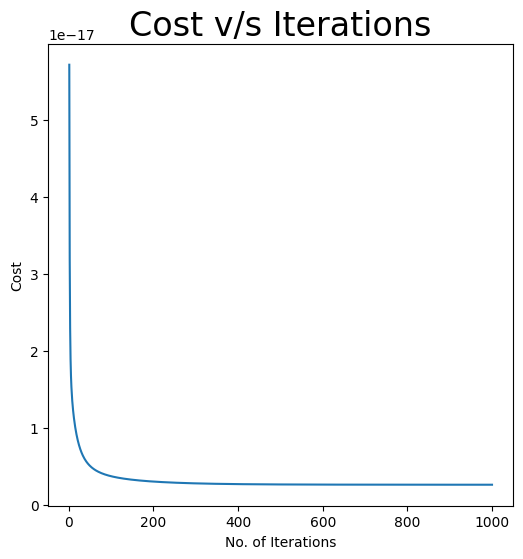

In [65]:
plt.figure(figsize = (6,6), dpi = 100)

plt.title("Cost v/s Iterations", fontdict = {'fontsize' : 24})
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

x_axis = list(range(1, n_iter_five+1, 1))
y_axis = (cost_history_five)

plt.plot(x_axis, y_axis, '-')

plt.show()

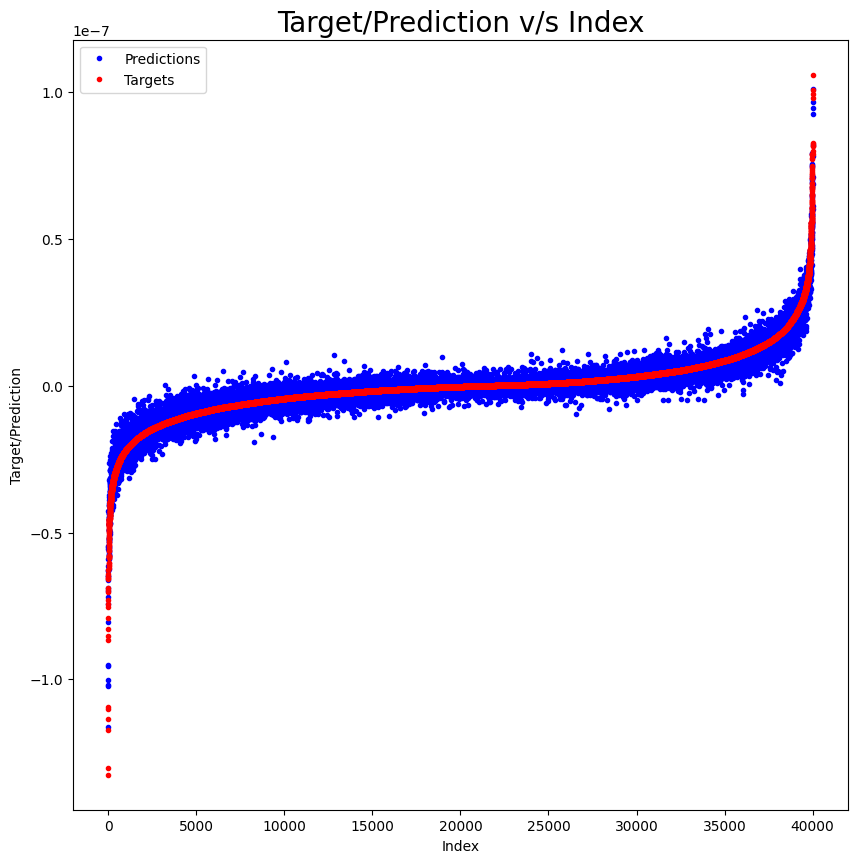

In [66]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_five = yhat_five[sorted_indices]

plt.plot(df.iloc[:m, 0], yhatsort_five, '.', color = 'b', label = 'Predictions')
plt.plot(df.iloc[:m, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

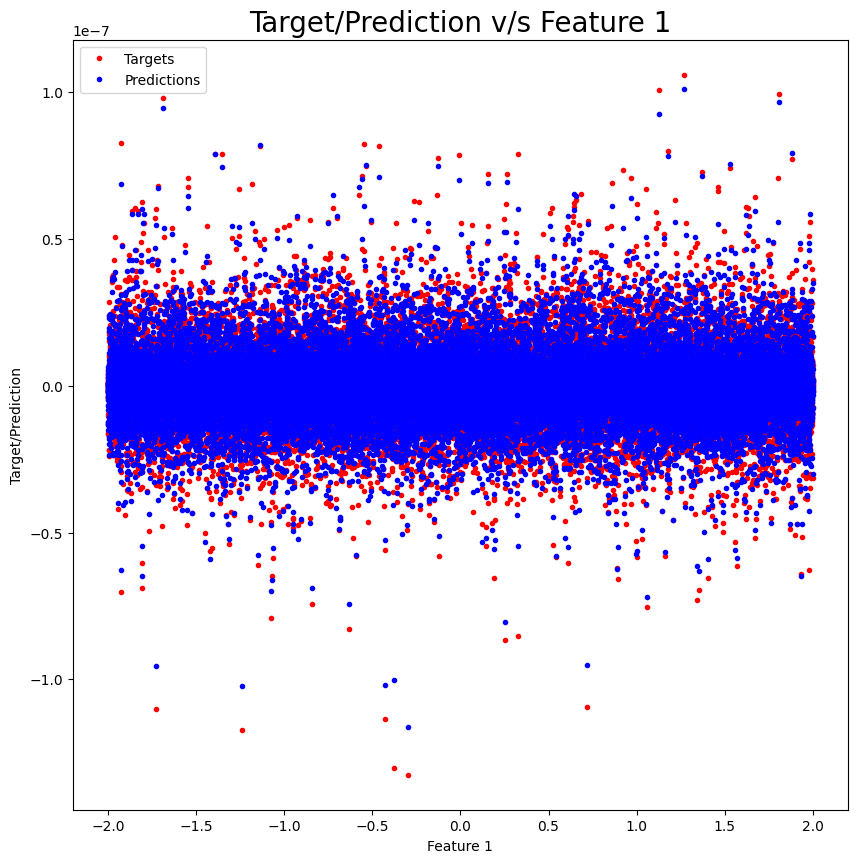

In [67]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Feature 1", fontdict = {'fontsize' : 20})
plt.xlabel("Feature 1")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_five = yhat_five[sorted_indices]

plt.plot(df.iloc[:m, 1], ysort, '.', color = 'r', label = 'Targets')
plt.plot(df.iloc[:m, 1], yhatsort_five, '.', color = 'b', label = 'Predictions')

plt.legend()
plt.show()

## Sixth-Degree Polynomial

In [68]:
X_six = pr.gen_poly(X, 6)
X_six, X_six_mean, X_six_std = lnr.normalize(X_six)

In [69]:
w_six = np.zeros(np.shape(X_six)[1])
b_six = 0

In [70]:
n_iter_six = 1000
alpha = 0.12
w_six, b_six, cost_history_six = lnr.gradient_descent_regularized(X_six, w_six, b_six, y, n_iter_six, alpha)

Cost at iteration 0: 5.714553682142028e-17
Cost at iteration 100: 5.075991168338628e-19
Cost at iteration 200: 1.9910942793881442e-19
Cost at iteration 300: 1.0840400663823133e-19
Cost at iteration 400: 7.016721483726704e-20
Cost at iteration 500: 5.020064426340656e-20
Cost at iteration 600: 3.822271478443527e-20
Cost at iteration 700: 3.036738531856094e-20
Cost at iteration 800: 2.489427897662917e-20
Cost at iteration 900: 2.0906015749775553e-20
Cost at iteration 1000: 1.792069347948405e-20


In [71]:
print(np.shape(X_six))
print(np.shape(w_six))
print(b_six)

(40000, 461)
(461,)
-2.924403503545158e-10


In [72]:
cost_history_six[::n_iter_six//50]

array([5.71455368e-17, 2.18261232e-18, 1.29888697e-18, 8.95025470e-19,
       6.59163680e-19, 5.07599117e-19, 4.03851528e-19, 3.29459311e-19,
       2.74202583e-19, 2.32020802e-19, 1.99109428e-19, 1.72964415e-19,
       1.51872872e-19, 1.34626417e-19, 1.20351467e-19, 1.08404007e-19,
       9.83016340e-20, 8.96781283e-20, 8.22522166e-20, 7.58056006e-20,
       7.01672148e-20, 6.52017811e-20, 6.08013835e-20, 5.68792030e-20,
       5.33648173e-20, 5.02006443e-20, 4.73392332e-20, 4.47411855e-20,
       4.23735491e-20, 4.02085698e-20, 3.82227148e-20, 3.63959029e-20,
       3.47108954e-20, 3.31528095e-20, 3.17087283e-20, 3.03673853e-20,
       2.91189088e-20, 2.79546117e-20, 2.68668193e-20, 2.58487266e-20,
       2.48942790e-20, 2.39980730e-20, 2.31552720e-20, 2.23615352e-20,
       2.16129572e-20, 2.09060157e-20, 2.02375277e-20, 1.96046103e-20,
       1.90046476e-20, 1.84352620e-20])

In [73]:
yhat_six = lnr.predict(X_six, w_six, b_six)
yhat_six

array([ 9.11652850e-10, -6.87527732e-10,  5.87001750e-10, ...,
        3.67546367e-08,  1.09546682e-08, -1.79541715e-08])

In [74]:
X_six_val = pr.gen_poly(X_val, 6)
X_six_val,_,_ = lnr.normalize(X_six_val, X_six_mean, X_six_std)
print(np.shape(X_six_val))

(4000, 461)


In [75]:
yhat_six_val = lnr.predict(X_six_val, w_six, b_six)
yhat_six_val

array([-1.00631555e-09, -2.05146853e-08, -2.72682945e-08, ...,
       -1.05041778e-08, -4.24253437e-09, -3.09800790e-09])

In [76]:
r2_six_train = lnr.r2_score(y, yhat_six)
r2_six_val = lnr.r2_score(y_val, yhat_six_val)
print(r2_six_train)
print(r2_six_val)

0.9996866301503898
0.9972898276829085


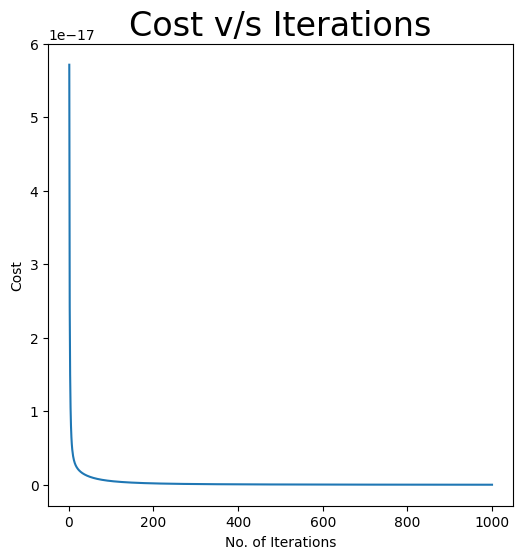

In [77]:
plt.figure(figsize = (6,6), dpi = 100)

plt.title("Cost v/s Iterations", fontdict = {'fontsize' : 24})
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

x_axis = list(range(1, n_iter_six+1, 1))
y_axis = (cost_history_six)

plt.plot(x_axis, y_axis, '-')

plt.show()

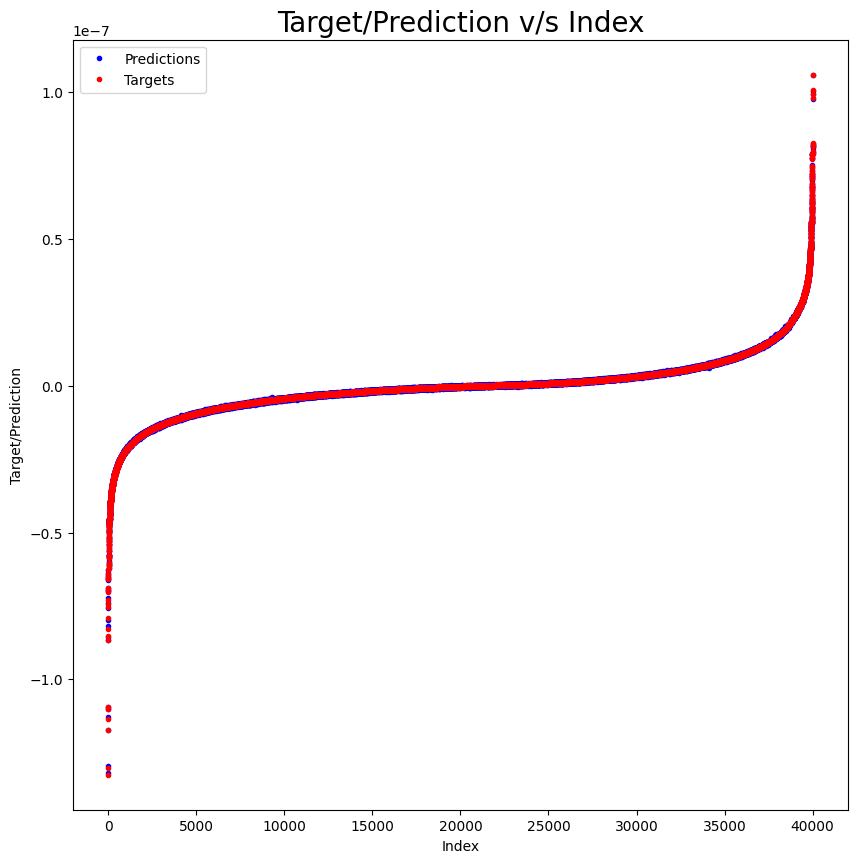

In [78]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_six = yhat_six[sorted_indices]

plt.plot(df.iloc[:m, 0], yhatsort_six, '.', color = 'b', label = 'Predictions')
plt.plot(df.iloc[:m, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

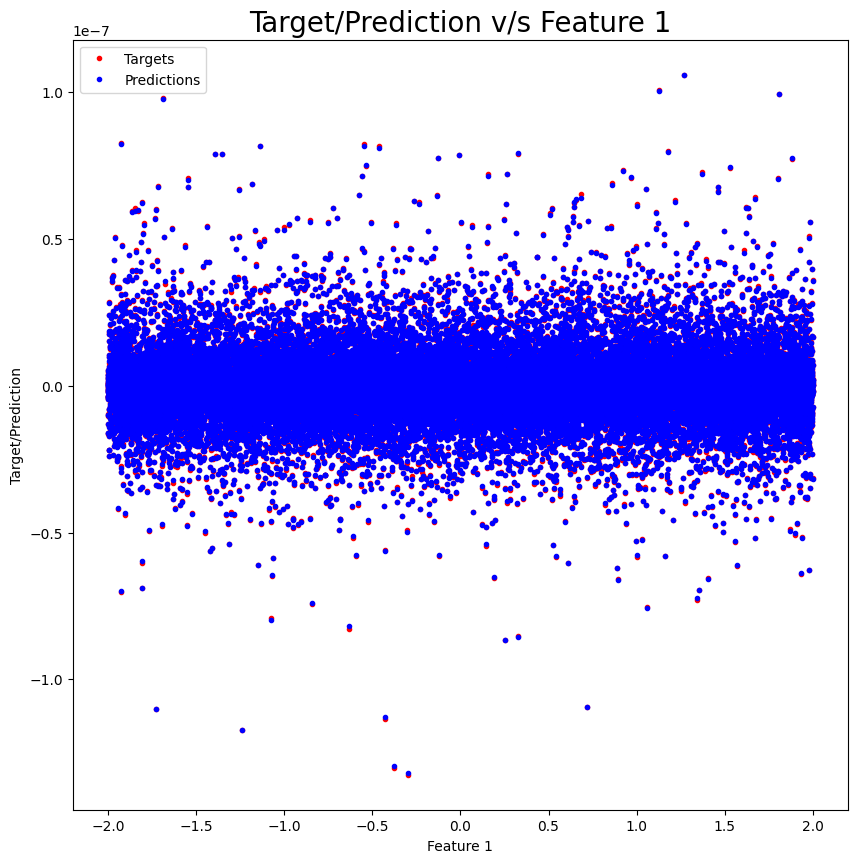

In [79]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Feature 1", fontdict = {'fontsize' : 20})
plt.xlabel("Feature 1")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_six = yhat_six[sorted_indices]

plt.plot(df.iloc[:m, 1], ysort, '.', color = 'r', label = 'Targets')
plt.plot(df.iloc[:m, 1], yhatsort_six, '.', color = 'b', label = 'Predictions')

plt.legend()
plt.show()

## Seventh-Degree Polynomial

In [80]:
X_seven = pr.gen_poly(X, 7)
X_seven, X_seven_mean, X_seven_std = lnr.normalize(X_seven)
w_seven = np.zeros(np.shape(X_seven)[1])
b_seven = 0

In [81]:
n_iter_seven = 1000
alpha = 0.063
w_seven, b_seven, cost_history_seven = lnr.gradient_descent(X_seven, w_seven, b_seven, y, n_iter_seven, alpha)

Cost at iteration 0: 5.714553682142028e-17
Cost at iteration 100: 8.812005064685424e-19
Cost at iteration 200: 4.4438656823626335e-19
Cost at iteration 300: 2.762344621936458e-19
Cost at iteration 400: 1.9182003799605208e-19
Cost at iteration 500: 1.4333907724099987e-19
Cost at iteration 600: 1.129031807122431e-19
Cost at iteration 700: 9.243748162779093e-20
Cost at iteration 800: 7.789398757802386e-20
Cost at iteration 900: 6.708987355078574e-20
Cost at iteration 1000: 5.884797011874176e-20


In [82]:
yhat_seven = lnr.predict(X_seven, w_seven, b_seven)
yhat_seven

array([ 9.27738422e-10, -8.31436374e-10,  7.64710762e-10, ...,
        3.69171176e-08,  1.05404767e-08, -1.79901619e-08])

In [83]:
X_seven_val = pr.gen_poly(X_val, 7)
X_seven_val,_,_ = lnr.normalize(X_seven_val, X_seven_mean, X_seven_std)
print(np.shape(X_seven_val))

(4000, 791)


In [84]:
yhat_seven_val = lnr.predict(X_seven_val, w_seven, b_seven)
yhat_seven_val

array([-9.36116616e-10, -2.05851020e-08, -2.78491651e-08, ...,
       -1.02339231e-08, -4.04841468e-09, -2.82930366e-09])

In [85]:
r2_seven_train = lnr.r2_score(y, yhat_seven)
r2_seven_val = lnr.r2_score(y_val, yhat_seven_val)
print(r2_seven_train)
print(r2_seven_val)

0.9989707265796366
0.9965141086986833


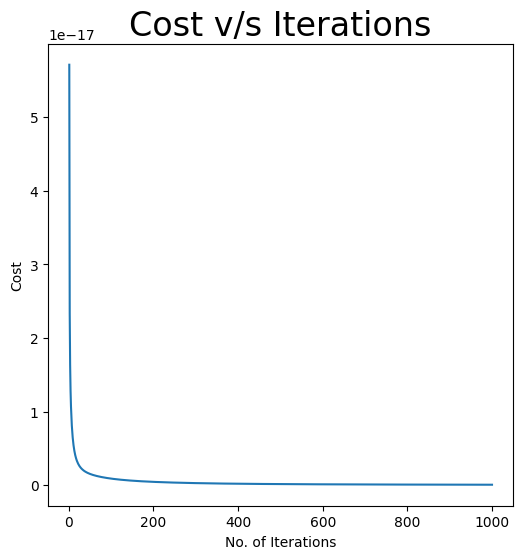

In [86]:
plt.figure(figsize = (6,6), dpi = 100)

plt.title("Cost v/s Iterations", fontdict = {'fontsize' : 24})
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

x_axis = list(range(1, n_iter_seven+1, 1))
y_axis = (cost_history_seven)

plt.plot(x_axis, y_axis, '-')

plt.show()

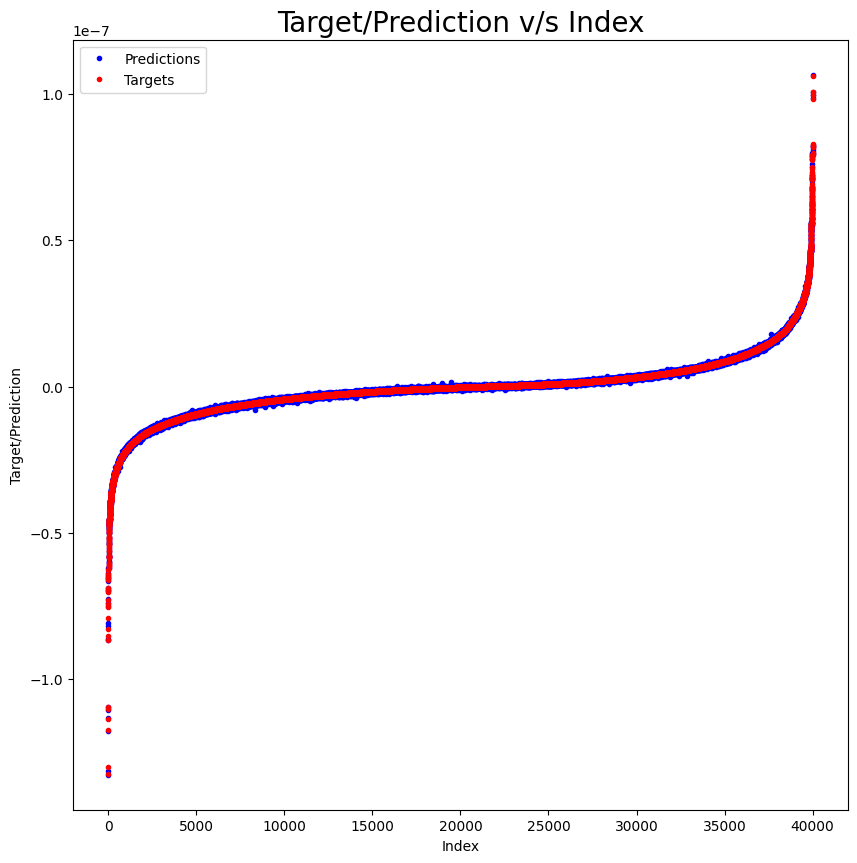

In [87]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_seven = yhat_seven[sorted_indices]

plt.plot(df.iloc[:m, 0], yhatsort_seven, '.', color = 'b', label = 'Predictions')
plt.plot(df.iloc[:m, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

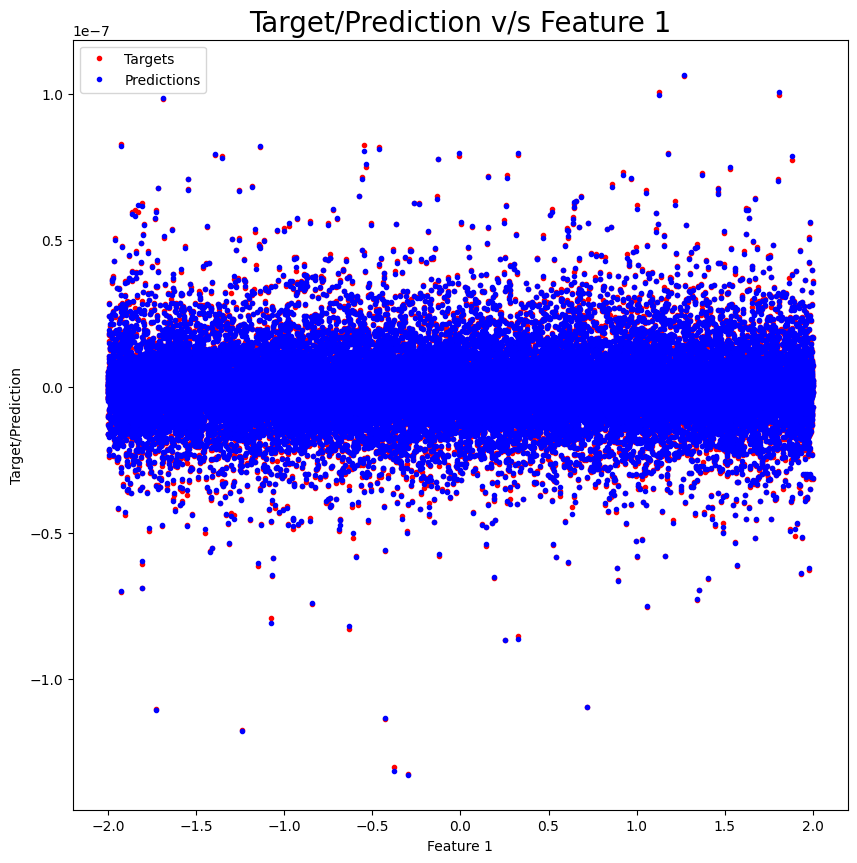

In [88]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Feature 1", fontdict = {'fontsize' : 20})
plt.xlabel("Feature 1")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_seven = yhat_seven[sorted_indices]

plt.plot(df.iloc[:m, 1], ysort, '.', color = 'r', label = 'Targets')
plt.plot(df.iloc[:m, 1], yhatsort_seven, '.', color = 'b', label = 'Predictions')

plt.legend()
plt.show()

## Eigth-Degree Polynomial

In [89]:
X_eight = pr.gen_poly(X, 8)
X_eight, X_eight_mean, X_eight_std = lnr.normalize(X_eight)

In [90]:
w_eight = np.zeros(np.shape(X_eight)[1])
b_eight = 0

In [91]:
n_iter_eight = 1000
alpha = 0.05
w_eight, b_eight, cost_history_eight = lnr.gradient_descent(X_eight, w_eight, b_eight, y, n_iter_eight, alpha)

Cost at iteration 0: 5.714553682142028e-17
Cost at iteration 100: 3.6085199494827846e-19
Cost at iteration 200: 1.7461585003441385e-19
Cost at iteration 300: 1.2331233140088555e-19
Cost at iteration 400: 9.981415416240616e-20
Cost at iteration 500: 8.635692280329937e-20
Cost at iteration 600: 7.748974287045015e-20
Cost at iteration 700: 7.103340507696965e-20
Cost at iteration 800: 6.599499500847628e-20
Cost at iteration 900: 6.187498752388609e-20
Cost at iteration 1000: 5.84299077462629e-20


In [92]:
yhat_eight = lnr.predict(X_eight, w_eight, b_eight)
yhat_eight

array([ 9.31994220e-10, -9.05020023e-10,  9.45338058e-10, ...,
        3.66609974e-08,  1.07198077e-08, -1.77247204e-08])

In [93]:
X_eight_val = pr.gen_poly(X_val, 8)
X_eight_val,_,_ = lnr.normalize(X_eight_val, X_eight_mean, X_eight_std)
print(np.shape(X_eight_val))

(4000, 1286)


In [94]:
yhat_eight_val = lnr.predict(X_eight_val, w_eight, b_eight)
yhat_eight_val

array([-7.56455167e-10, -2.01887835e-08, -2.72327255e-08, ...,
       -1.02252499e-08, -3.64042063e-09, -3.09464082e-09])

In [95]:
r2_eight_train = lnr.r2_score(y, yhat_eight)
r2_eight_val = lnr.r2_score(y_val, yhat_eight_val)
print(r2_eight_train)
print(r2_eight_val)

0.9989773227102993
0.9965398677412325


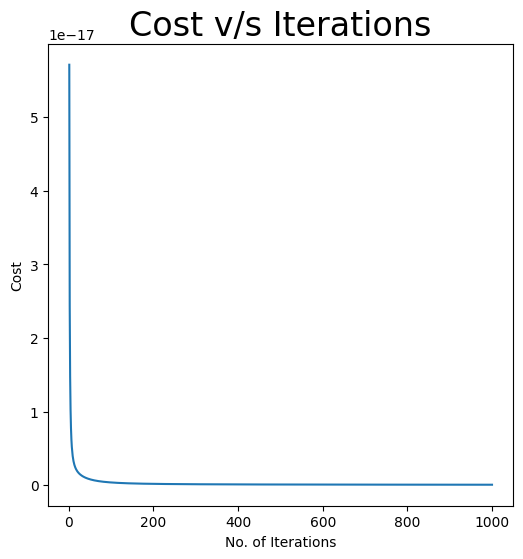

In [96]:
plt.figure(figsize = (6,6), dpi = 100)

plt.title("Cost v/s Iterations", fontdict = {'fontsize' : 24})
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")

x_axis = list(range(1, n_iter_eight+1, 1))
y_axis = (cost_history_eight)

plt.plot(x_axis, y_axis, '-')

plt.show()

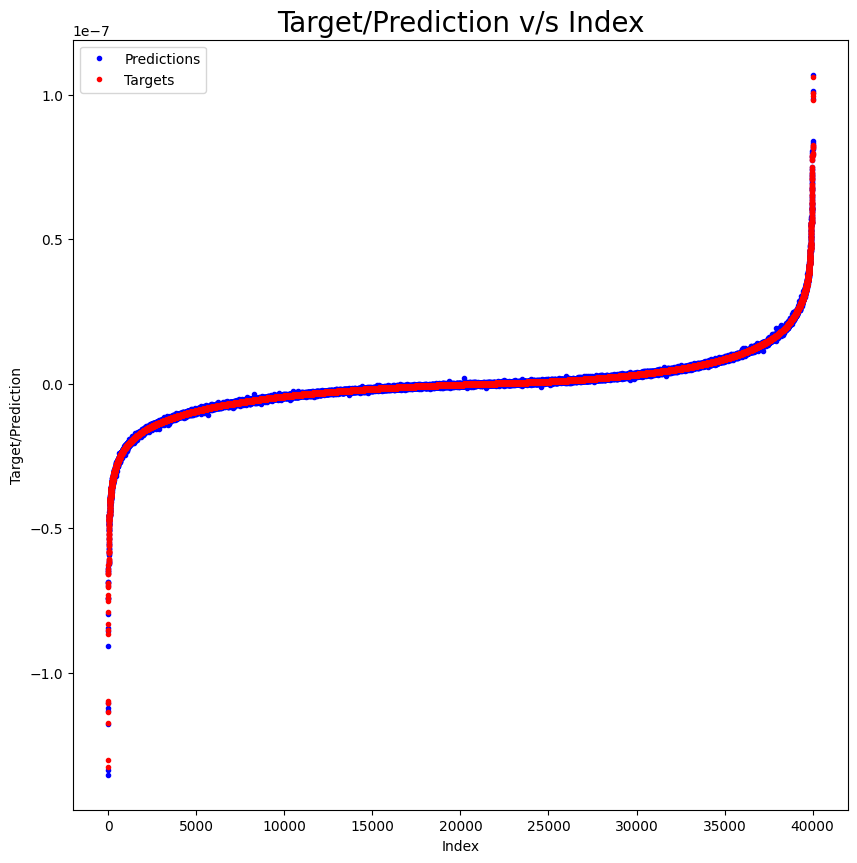

In [97]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_eight = yhat_eight[sorted_indices]

plt.plot(df.iloc[:m, 0], yhatsort_eight, '.', color = 'b', label = 'Predictions')
plt.plot(df.iloc[:m, 0], ysort, '.', color = 'r', label = 'Targets')

plt.legend()
plt.show()

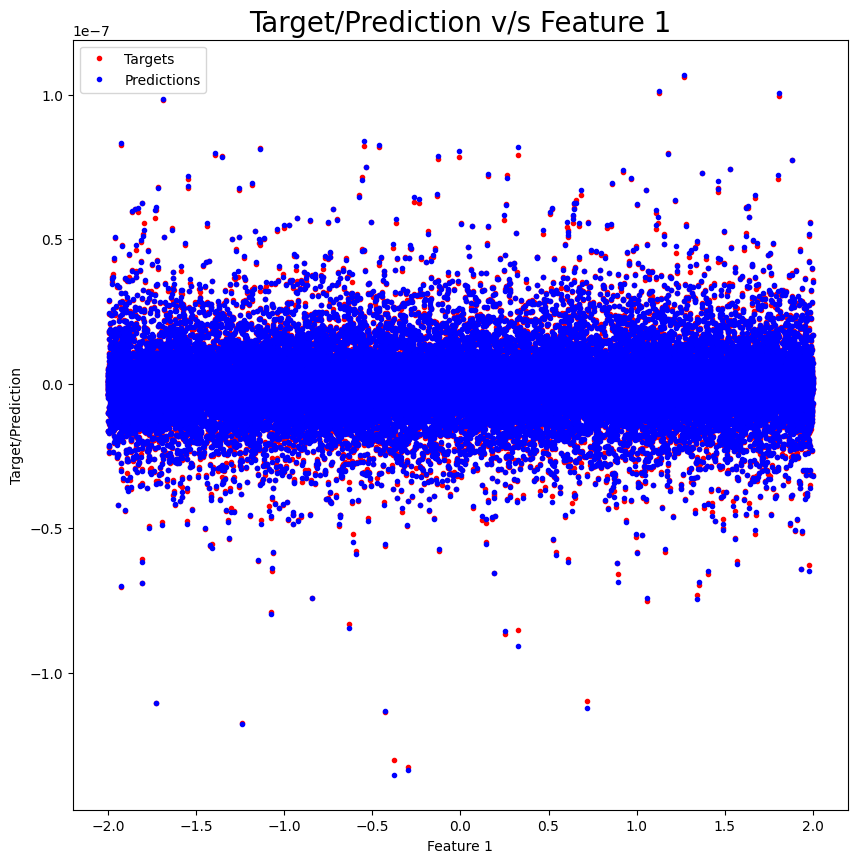

In [98]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Target/Prediction v/s Feature 1", fontdict = {'fontsize' : 20})
plt.xlabel("Feature 1")
plt.ylabel("Target/Prediction")

sorted_indices = np.argsort(y)
ysort = y[sorted_indices]
yhatsort_eight = yhat_eight[sorted_indices]

plt.plot(df.iloc[:m, 1], ysort, '.', color = 'r', label = 'Targets')
plt.plot(df.iloc[:m, 1], yhatsort_eight, '.', color = 'b', label = 'Predictions')

plt.legend()
plt.show()

## Conclusion to Training Dataset

In [99]:
print(cost_history_quad[-1])
print(cost_history_cube[-1])
print(cost_history_four[-1])
print(cost_history_five[-1])
print(cost_history_six[-1])
print(cost_history_seven[-1])
print(cost_history_eight[-1])

2.9974929650215965e-17
2.2714181880812542e-17
4.2439317992647685e-18
2.6649659430827802e-18
1.792069347948405e-20
5.884797011874176e-20
5.84299077462629e-20


In [100]:
print(r2_quad_train)
print(r2_quad_val)

0.4750705364028074
0.48252755528599567


In [101]:
print(r2_cube_train)
print(r2_cube_val)

0.6022228093405007
0.6259189229795851


In [102]:
print(r2_four_train)
print(r2_four_val)

0.9256791424425194
0.9257475262736267


In [103]:
print(r2_five_train)
print(r2_five_val)

0.9533304954212152
0.9514385286724253


In [104]:
print(r2_six_train)
print(r2_six_val)

0.9996866301503898
0.9972898276829085


In [105]:
print(r2_seven_train)
print(r2_seven_val)

0.9989707265796366
0.9965141086986833


In [106]:
print(r2_eight_train)
print(r2_eight_val)

0.9989773227102993
0.9965398677412325


Here, the sixth-degree polynomial works best when we consider both accuracy and efficiency.

The chances of overfitting are fairly low because of the huge dataset.

Hence, we will be using the sixth-degree model.

In [107]:
X_testt = np.array(df.iloc[44000:,1:6])
X_testt = pr.gen_poly(X_testt, 6)
X_testt,_,_ = lnr.normalize(X_testt, X_six_mean, X_six_std)
print(np.shape(X_testt))

(4000, 461)


In [108]:
y_testt = np.array(df.iloc[44000:,6])
print(np.shape(y_testt))

(4000,)


In [109]:
yhat_testt = lnr.predict(X_testt, w_six, b_six)
print(np.shape(yhat_testt))

(4000,)


In [110]:
r2_testt = lnr.r2_score(y_testt, yhat_testt)
r2_testt

0.9983340546771801

# Testing Dataset

In [4]:
df_test = pd.read_csv("/datasets/polynomial_regression_test.csv")
df_test.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,1,1.718004,-0.201814,0.791965,-0.410485,1.678171
1,2,0.782395,0.897345,-0.059263,-1.725306,-1.363520
2,3,0.619033,0.397670,-0.506356,-0.546682,-1.629186
3,4,1.950046,-1.874789,-0.144491,1.952435,1.908823
4,5,0.097417,0.960511,-1.031956,-1.585839,-1.297509


In [112]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         12000 non-null  int64  
 1   Feature_1  12000 non-null  float64
 2   Feature_2  12000 non-null  float64
 3   Feature_3  12000 non-null  float64
 4   Feature_4  12000 non-null  float64
 5   Feature_5  12000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 562.6 KB


In [113]:
df_test.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,-0.001217,-0.012906,0.001238,0.000015,0.014702
std,3464.24595,1.161914,1.151914,1.153702,1.152276,1.156921
min,1.00000,-1.999981,-1.999414,-1.999596,-1.999772,-1.999974
25%,3000.75000,-1.003685,-1.014073,-1.003173,-0.997863,-0.993932
50%,6000.50000,-0.008865,-0.024693,-0.003139,-0.017426,0.039961
75%,9000.25000,1.020433,0.982452,1.002238,0.994280,1.016742
max,12000.00000,1.999500,1.999529,1.999391,1.998760,1.999932


In [114]:
X_test = np.array(df_test.iloc[:, 1:])
print(np.shape(X_test))

(12000, 5)


In [115]:
m_test,n_test = np.shape(X_test)
print(m_test)
print(n_test)

12000
5


In [116]:
X_test_six = pr.gen_poly(X_test, 6)
X_test_six,_,_ = lnr.normalize(X_test_six, X_six_mean, X_six_std)
print(np.shape(X_test_six))

(12000, 461)


In [117]:
yhat_test = lnr.predict(X_test_six, w_six, b_six)
yhat_test

array([ 1.26894154e-08, -1.10905429e-08, -1.00668872e-09, ...,
       -2.55191090e-09, -2.49658192e-09, -1.96483695e-09])

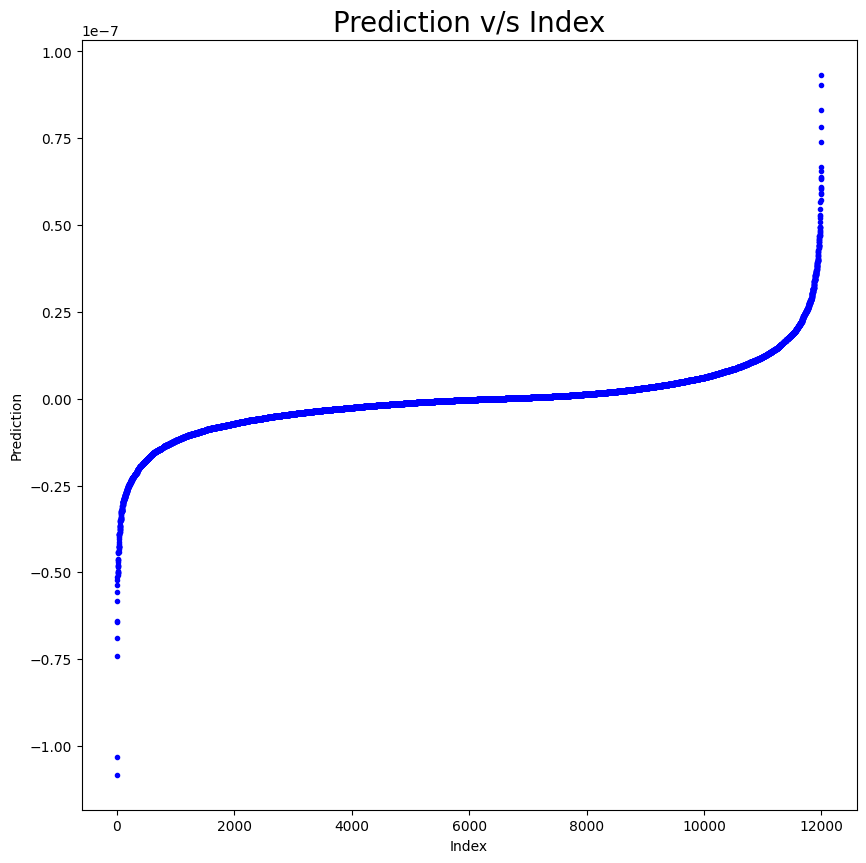

In [118]:
plt.figure(figsize = (10,10), dpi = 100)

plt.title("Prediction v/s Index", fontdict = {'fontsize' : 20})
plt.xlabel("Index")
plt.ylabel("Prediction")

sorted_indices_test = np.argsort(yhat_test)
yhatsort_test = yhat_test[sorted_indices_test]

plt.plot(df_test.iloc[:, 0], yhatsort_test, '.', color = 'b', label = 'Predictions')

plt.show()